In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_excel("deployment_times.xlsx")
df["Total Deployment Time"] = df["Upload Package Time"] + df["Deploy Function Time"]
df = df[df["Function"]!="down-up"]
df

,Unnamed: 0,Function,FaaS,Input,Output,Service,Upload Package Time,Deploy Function Time,Package Size,Total Deployment Time
10,10,speech-recognition,aws,aws,aws,aws,16.000000,2.444444,12.1,18.444444
11,11,speech-recognition,aws,aws,aws,gcp,23.111111,3.555556,50.0,26.666667
12,12,speech-recognition,aws,aws,gcp,aws,18.888889,2.444444,22.5,21.333333
13,13,speech-recognition,aws,aws,gcp,gcp,22.666667,3.444444,51.6,26.111111
14,14,speech-recognition,aws,core,core,core,44.777778,3.222222,58.6,48.000000
15,15,speech-recognition,aws,gcp,aws,aws,20.111111,2.666667,22.5,22.777778
16,16,speech-recognition,aws,gcp,aws,gcp,28.333333,3.444444,51.6,31.777778
17,17,speech-recognition,aws,gcp,gcp,aws,18.444444,2.555556,19.3,21.000000
18,18,speech-recognition,aws,gcp,gcp,gcp,25.000000,3.222222,41.8,28.222222
19,19,speech-recognition,gcp,aws,aws,aws,6.111111,66.111111,12.1,72.222222


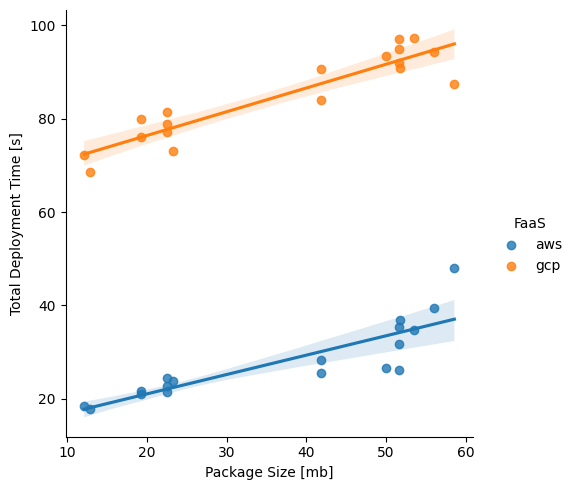

In [75]:
ax = sns.lmplot(df, x="Package Size", y="Total Deployment Time", hue="FaaS")
ax.set_axis_labels("Package Size [mb]", "Total Deployment Time [s]")
ax.tight_layout()
ax.savefig("total-sequential-deployment-time.png") 

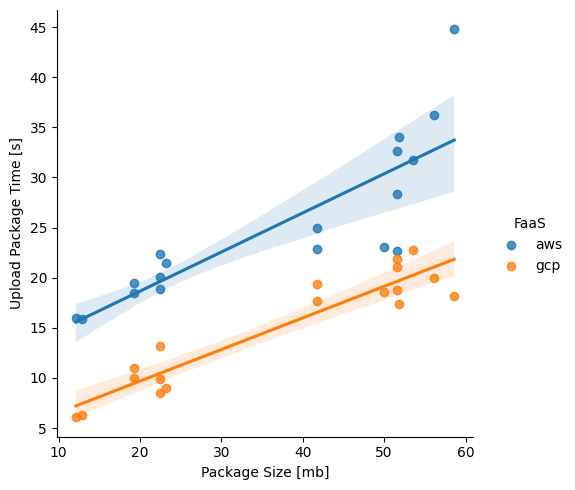

In [76]:
ax = sns.lmplot(df, x="Package Size", y="Upload Package Time", hue="FaaS")
ax.set_axis_labels("Package Size [mb]", "Upload Package Time [s]")
ax.tight_layout()
ax.savefig("upload-sequential-deployment-time.png") 

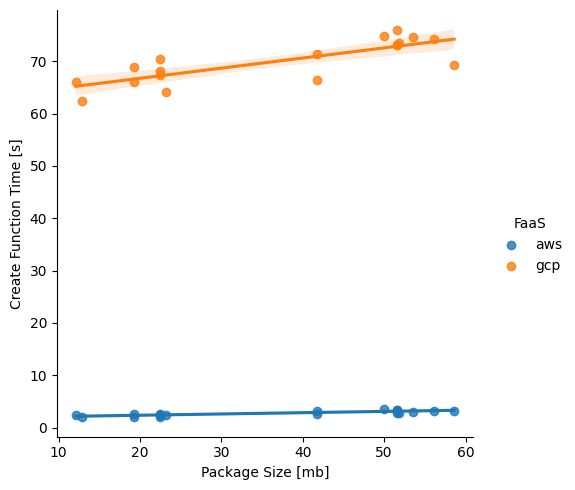

In [77]:
ax = sns.lmplot(df, x="Package Size", y="Deploy Function Time", hue="FaaS")
ax.set_axis_labels("Package Size [mb]", "Create Function Time [s]")
ax.tight_layout()
ax.savefig("create-function-sequential-deployment-time.png") 

In [78]:
df = pd.read_excel("deployment-times-parallel.xlsx")
df["Total Deployment Time"] = df["Upload Package Time"] + df["Deploy Function Time"]
df = df[df["Function"]!="down-up"]
df

,Function,Provider,SDK,Upload Package Time,Deploy Function Time,Total Deployment Time
4,speech-synthesis,AWS,CORE,36.222222,3.222222,39.444444
5,speech-synthesis,GCP,CORE,20.000000,74.333333,94.333333
6,speech-synthesis,AWS,Native,195.200000,22.000000,217.200000
7,speech-synthesis,GCP,Native,104.200000,81.600000,185.800000
8,speech-recognition,AWS,CORE,44.777778,3.222222,48.000000
9,speech-recognition,GCP,CORE,18.222222,69.222222,87.444444
10,speech-recognition,AWS,Native,198.200000,21.200000,219.400000
11,speech-recognition,GCP,Native,116.200000,92.400000,208.600000


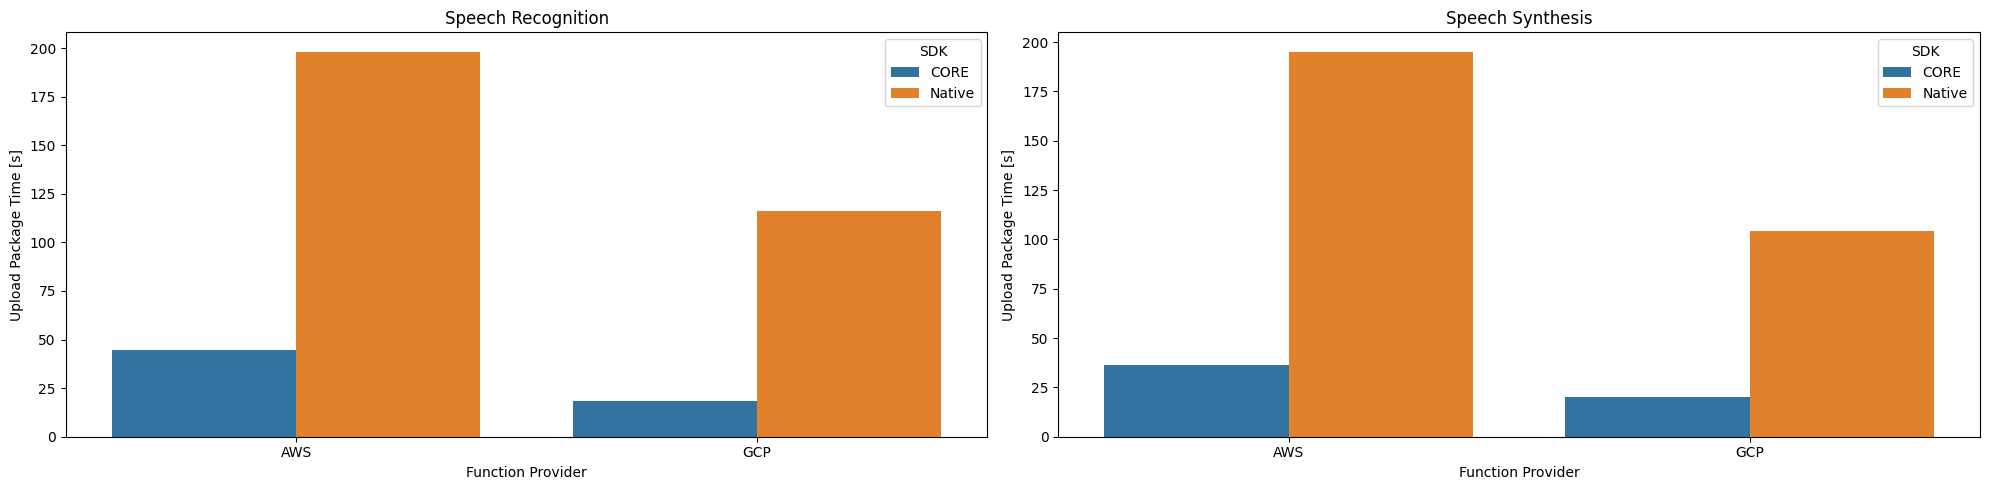

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.barplot(df[df["Function"]=="speech-recognition"], x="Provider", y="Upload Package Time", hue="SDK", ax=axes[0])
axes[0].set_xlabel("Function Provider")
axes[0].set_ylabel("Upload Package Time [s]")
axes[0].set_title("Speech Recognition")
sns.barplot(df[df["Function"]=="speech-synthesis"], x="Provider", y="Upload Package Time", hue="SDK", ax=axes[1])
axes[1].set_xlabel("Function Provider")
axes[1].set_ylabel("Upload Package Time [s]")
axes[1].set_title("Speech Synthesis")
fig.tight_layout()
fig.savefig("upload-package-parallel-deployment-time.png") 

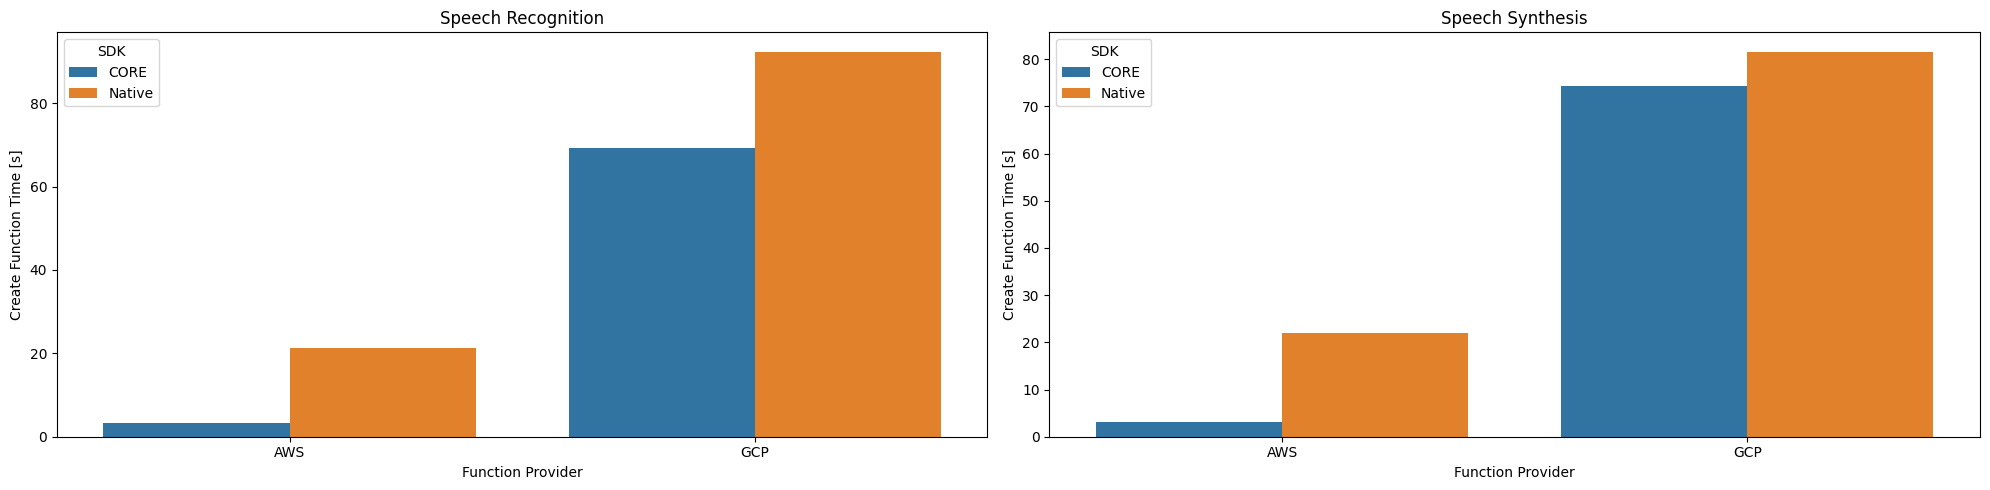

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.barplot(df[df["Function"]=="speech-recognition"], x="Provider", y="Deploy Function Time", hue="SDK", ax=axes[0])
axes[0].set_xlabel("Function Provider")
axes[0].set_ylabel("Create Function Time [s]")
axes[0].set_title("Speech Recognition")
sns.barplot(df[df["Function"]=="speech-synthesis"], x="Provider", y="Deploy Function Time", hue="SDK", ax=axes[1])
axes[1].set_xlabel("Function Provider")
axes[1].set_ylabel("Create Function Time [s]")
axes[1].set_title("Speech Synthesis")
fig.tight_layout()
fig.savefig("create-function-parallel-deployment-time.png") 

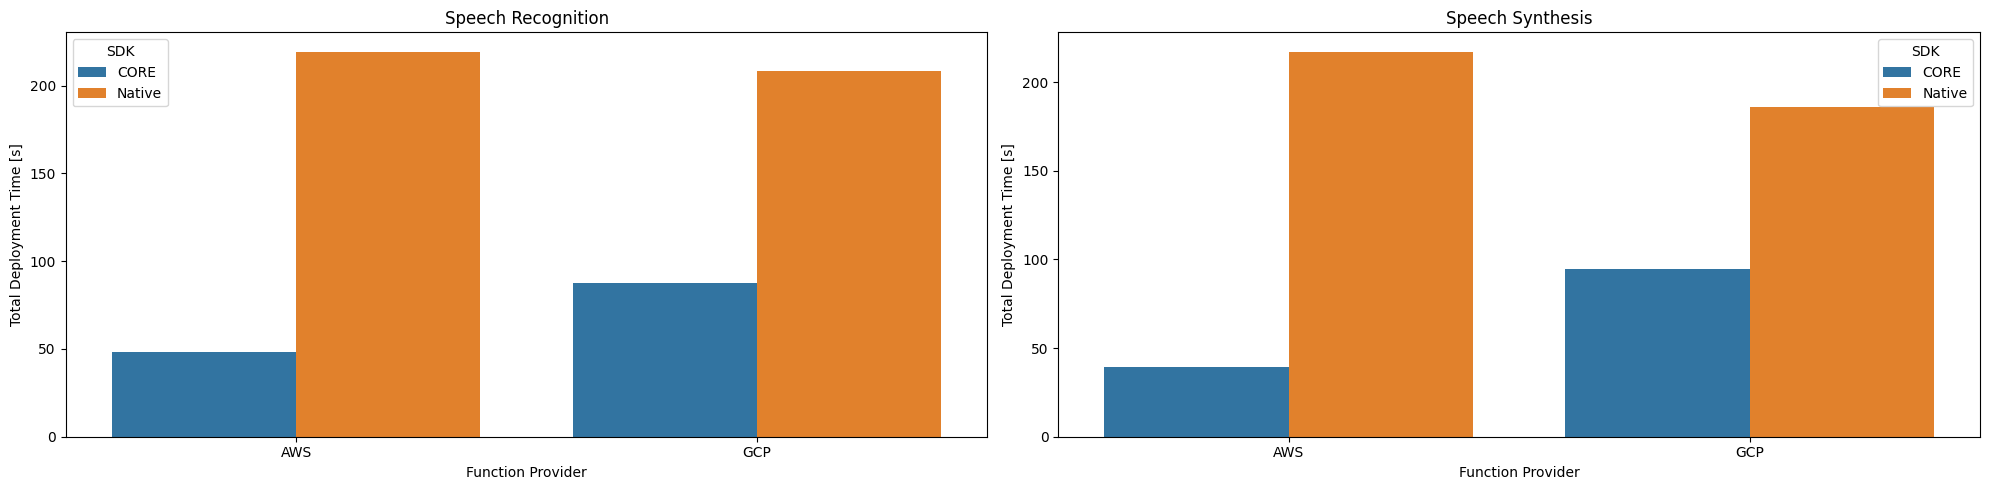

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.barplot(df[df["Function"]=="speech-recognition"], x="Provider", y="Total Deployment Time", hue="SDK", ax=axes[0])
axes[0].set_xlabel("Function Provider")
axes[0].set_ylabel("Total Deployment Time [s]")
axes[0].set_title("Speech Recognition")
sns.barplot(df[df["Function"]=="speech-synthesis"], x="Provider", y="Total Deployment Time", hue="SDK", ax=axes[1])
axes[1].set_xlabel("Function Provider")
axes[1].set_ylabel("Total Deployment Time [s]")
axes[1].set_title("Speech Synthesis")
fig.tight_layout()
fig.savefig("total-parallel-deployment-time.png") 